Code builds and trains CNN to classify images from the CIFAR-10 dataset.

Data can be found here:
http://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#unflatten row to np arrays of red, green, and blue values for each pixel
def rgb(array):
    temp =[]
    count = 0
    while count < 1024:
        temp.append(array[count])
        temp.append(array[(count+1024)])
        temp.append(array[(count+2048)])
        count += 1
    final = np.array(temp)
    final = np.reshape(final, (32,32,3))
    
    return final

In [3]:
#unflatten array
def ufa(input_array):
    output_array = np.empty(shape=(input_array.shape[0],32,32,3))   
    count = 0
    while count < input_array.shape[0]:
        #unflattens every row in the input array
        output_array[count] = rgb(input_array[count])
        count +=1
    return output_array.astype(int)

In [4]:
#method to unpickle files
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [5]:
#unpickle files downloaded from http://www.cs.toronto.edu/~kriz/cifar.html
db1 = unpickle('data_batch_1')
db2 = unpickle('data_batch_2')
db3 = unpickle('data_batch_3')
db4 = unpickle('data_batch_4')
db5 = unpickle('data_batch_5')
db_test = unpickle('test_batch')

In [6]:
db_all_labels = np.concatenate([db1['labels'],db2['labels'],db3['labels'],db4['labels'],db5['labels']])

#flattened data inputs for most models
X_train_flat = np.vstack([db1['data'],db2['data'],db3['data'],db4['data'],db5['data']])
X_test_flat=db_test['data']

#unflattened data is for CNN model
X_train_uf = ufa(X_train_flat)
#convert labels to one hot encoding
y_train = np.eye(10)[db_all_labels]

X_test_uf = ufa(X_test_flat)
y_test = np.eye(10)[db_test['labels']]

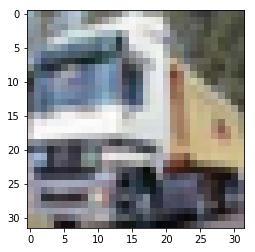

In [36]:
#test images for unflattened data
plt.imshow(X_train_uf[1]);

In [51]:
#
#Build CNN
#
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.regularizers import l2, l1
from keras.optimizers import SGD

model = Sequential()
model.add(Convolution2D(32, (4,4), strides = (2,2), border_mode='valid', 
                        input_shape=X_train_uf.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='relu',W_regularizer=l2(0.01)))
model.add(Dense(100, activation='relu',W_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), padding="valid", strides=(2, 2), activation="relu", input_shape=(32L, 32L,...)`
  if __name__ == '__main__':
C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_regularizer=<keras.reg...)`
  


"\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Activation, Flatten, Conv2D\nfrom keras.regularizers import l2, l1\nfrom keras.optimizers import SGD\nmodel = Sequential()\n\n\n# Create layers:\nmodel.add(Conv2D(32, (3, 3), padding='same',\n                 input_shape=X_train_uf.shape[1:])\n\n# Compile model\nsgd = SGD(lr=0.1)\nmodel.compile(loss='categorical_crossentropy', optimizer=sgd)\n\nmodel.summary()\n\n# Fit the model - I think we need to use model.fit_generator here, but I don't \n# really understand why.\n#history = model.fit(X_train, y_train, batch_size = 32,\n#          nb_epoch = 100, verbose=1, validation_data=(X_test,y_test))\n"

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 15L, 15L, 32)      1568      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7L, 7L, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7L, 7L, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               156900    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total para

In [53]:
history = model.fit(X_train_uf, y_train, batch_size = 1000,
          nb_epoch = 50, verbose=1, validation_data=(X_test_uf,y_test))

C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 266us/step - loss: 9.0582 - acc: 0.1521 - val_loss: 4.0729 - val_acc: 0.2290
Epoch 2/50
50000/50000 [==============================] - 13s 263us/step - loss: 3.6654 - acc: 0.3055 - val_loss: 3.2249 - val_acc: 0.3940
Epoch 3/50
50000/50000 [==============================] - 13s 264us/step - loss: 3.1006 - acc: 0.3864 - val_loss: 2.7713 - val_acc: 0.4575
Epoch 4/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.7238 - acc: 0.4389 - val_loss: 2.4733 - val_acc: 0.4848
Epoch 5/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.4376 - acc: 0.4806 - val_loss: 2.2248 - val_acc: 0.5280
Epoch 6/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.2137 - acc: 0.5098 - val_loss: 2.0499 - val_acc: 0.5485
Epoch 7/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.0535 - acc: 0.5248 - val_loss: 1.

Loss after final iteration:  1.17622271776


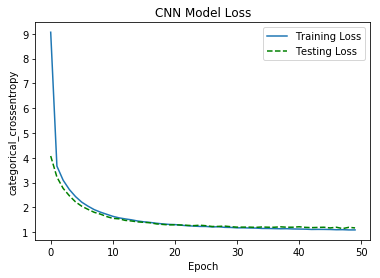

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('CNN Model Loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [55]:
#Converts one hot encoding to class
def ohe_to_class(r):
    return[np.argmax(c) for c in r]

In [56]:
#
#Print confusion matrix and classification report for the model. 
#

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

predict_all = model.predict_classes(np.array(X_test_uf))

y_true_class = ohe_to_class(y_test)

print('accuracy', accuracy_score(predict_all, y_true_class))

print('confusion_matrix')
print(confusion_matrix(predict_all, y_true_class))
print('classification_report\n\n'+classification_report(predict_all, y_true_class))


('accuracy', 0.66659999999999997)
confusion_matrix
[[735  17  70  26  28  18   6  15  71  43]
 [ 19 813   9  20   5   6   7   7  40 132]
 [ 35   6 439  53  32  39  15  28   9   7]
 [ 18   5  49 418  35 181  28  37  11  10]
 [ 31   6 174 128 714 123  59 100  12  10]
 [  1   5  55 112  20 444  15  33   4   6]
 [ 18  16 120 125  93  82 852  27  16  18]
 [ 11   2  44  49  56  72   3 737   3  21]
 [ 94  42  24  35  13  18   8   6 807  46]
 [ 38  88  16  34   4  17   7  10  27 707]]
classification_report

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1029
           1       0.81      0.77      0.79      1058
           2       0.44      0.66      0.53       663
           3       0.42      0.53      0.47       792
           4       0.71      0.53      0.61      1357
           5       0.44      0.64      0.52       695
           6       0.85      0.62      0.72      1367
           7       0.74      0.74      0.74       998
        